# Задание
Выполните задания, используя jupyter.

### Задания для итоговой аттестации

<div class="alert alert-info">
Вы выбрали Dataset из списка, проведите полный цикл работы над вашим проектом, что проходили ранее. Pipeline выполнения задачи:

1. Загрузка и предобработка данных

2. Описательный анализ данных, просмотр данных и вывод статистики

3. Постройте необходимые графики для анализа

4. Проверьте гипотезы (если потребуется)

5. Сделайте промежуточный отчет-вывод по исследованию

6. Определите, какую задачу вы будете решать (классификация, регрессия и т.д.)

7. Создайте несколько моделей для прогнозирования вашего целевого признака и выберите наилучшую, опираясь на вашу валидацию

8. Сделайте прогноз для тестовой выборки (должно быть три выборки в этой задаче: тренировочная, валидационная, тестовая)

9. Приведите метрику, с помощью которой вы будете оценивать работу вашей модели (обоснуйте ваш выбор метрики)

10. Сделайте вывод о работе вашей модели и метриках. Обоснуйте: «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?»

Рекомендации:

> Соблюдайте PEP8

> Комментируйте код в местах, где конструкция большая

> Оставляйте промежуточные выводы по вашему исследованию и построению модели (так кураторам будет проще понять ваши заключения)

> Экспериментируйте! Вы не ограничены в моделях и подходах. Можете использовать любые DS инструменты (и те, которые мы не разбирали с вами на курсе)

<div style='border:solid blue 2px; padding: 20px'>
    
Загрузка данных
Этот классический набор данных содержит цены и другие атрибуты почти 54 000 бриллиантов. В набор данных включено 10 атрибутов, включая целевой ie. цена.

Описание функции:

цена цена в долларах США (\$326--\$18 823)Это целевой столбец, содержащий теги для функций. 

4 Кс бриллиантов:-

карат (0,2-5,01) Карат - это физический вес бриллианта, измеряемый в метрических каратах.  Один карат равен 1/5 грамма и делится на 100 пунктов. Вес в каратах - наиболее объективный показатель качества 4Cs. 

покрой (Светлый, Хороший, Очень хороший, Премиум, Идеальный) При определении качества огранки оценщик оценивает мастерство огранщика в обработке алмаза. Чем точнее огранка бриллианта, тем привлекательнее он выглядит для глаз.  

цвет, от J (худший) до D (лучший) Цвет бриллиантов ювелирного качества бывает самых разных оттенков. В диапазоне от бесцветного до светло-желтого или светло-коричневого. Бесцветные бриллианты - самые редкие. Другие натуральные цвета (например, синий, красный, розовый) известны как "фантазийные”, и их цветовая гамма отличается от белых бесцветных бриллиантов.  

ясность (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший)) Алмазы могут иметь внутренние характеристики, известные как включения, или внешние характеристики, известные как дефекты. Алмазы без включений или дефектов встречаются редко; однако большинство характеристик можно увидеть только при увеличении.  

Размеры

x -  длина в мм (0--10,74)

y - ширина по оси  в мм (0--58,9)

z - высота в мм (0--31,8)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor

from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
Image(url= "https://horlogesensieraden.com/wp-content/uploads/2020/10/hero-cut-5000x2813-866x624-1.jpg")

<div class="alert alert-info">

> 1. Загрузка и предобработка данных

> 2. Описательный анализ данных, просмотр данных и вывод статистики

> 3. Постройте необходимые графики для анализа

> 4. Проверьте гипотезы (если потребуется)

> 5. Сделайте промежуточный отчет-вывод по исследованию

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
43564,43565,0.59,Ideal,G,SI1,62.3,55.0,1431,5.37,5.39,3.35
35524,35525,0.43,Premium,F,VS2,59.8,58.0,905,4.89,4.94,2.94
4678,4679,0.70,Ideal,G,IF,60.2,57.0,3672,5.78,5.84,3.50
29192,29193,0.40,Ideal,E,SI1,62.4,53.0,694,4.73,4.75,2.96
31600,31601,0.20,Premium,D,VS2,62.3,60.0,367,3.73,3.68,2.31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<div class="alert alert-success">
Все данные у нас количественные. Никаких пропусков не обнаружено

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

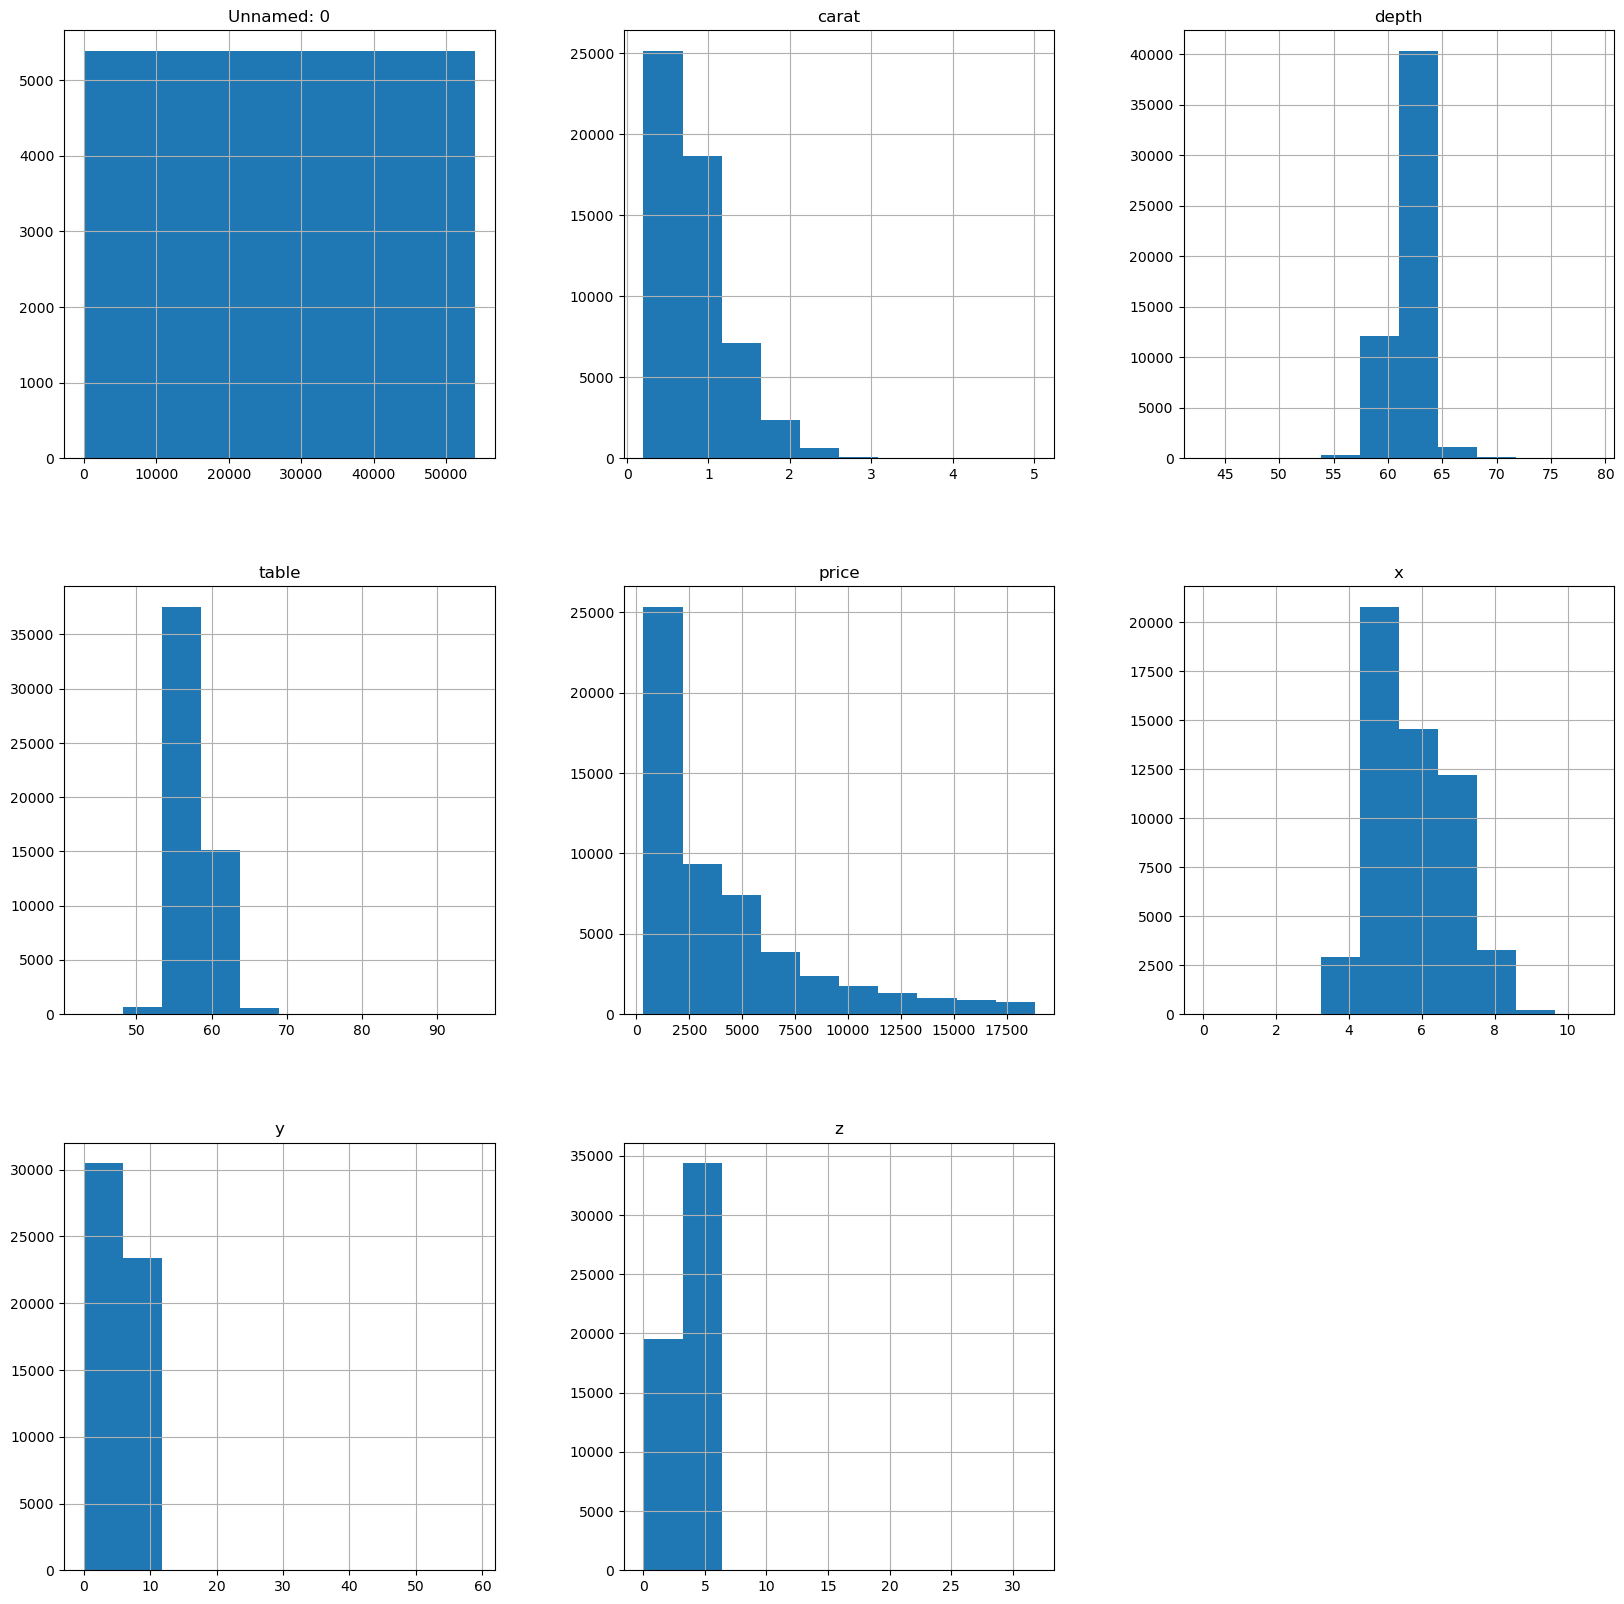

In [6]:
df.hist(figsize=(20, 20))

<div class="alert alert-warning">
Намеки на нормальное распределение отсутсвуют

<div class="alert alert-danger">
В виду того, что столбец "Unnamed: 0" просто является номером алмаза мы ее убираем.

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

<div class="alert alert-danger">
Минимальное значение "x", "y", "z" равно нулю. Это указывает на наличие ошибочных значений в данных, представляющих безразмерные или двумерные алмазы. Поэтому нам нужно отфильтровать их, поскольку это явно неверные данные.

In [8]:
df = df.drop(df[df["x"] == 0].index)
df = df.drop(df[df["y"] == 0].index)
df = df.drop(df[df["z"] == 0].index)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


**Мы потеряли 20 точек данных, удалив безразмерные (2-мерные или 1-мерные) бриллианты.**

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<div class="alert alert-info">
    <b>Вывод: Краней высокий дисбаланс по ценам за камень </b>


</div>

<Axes: >

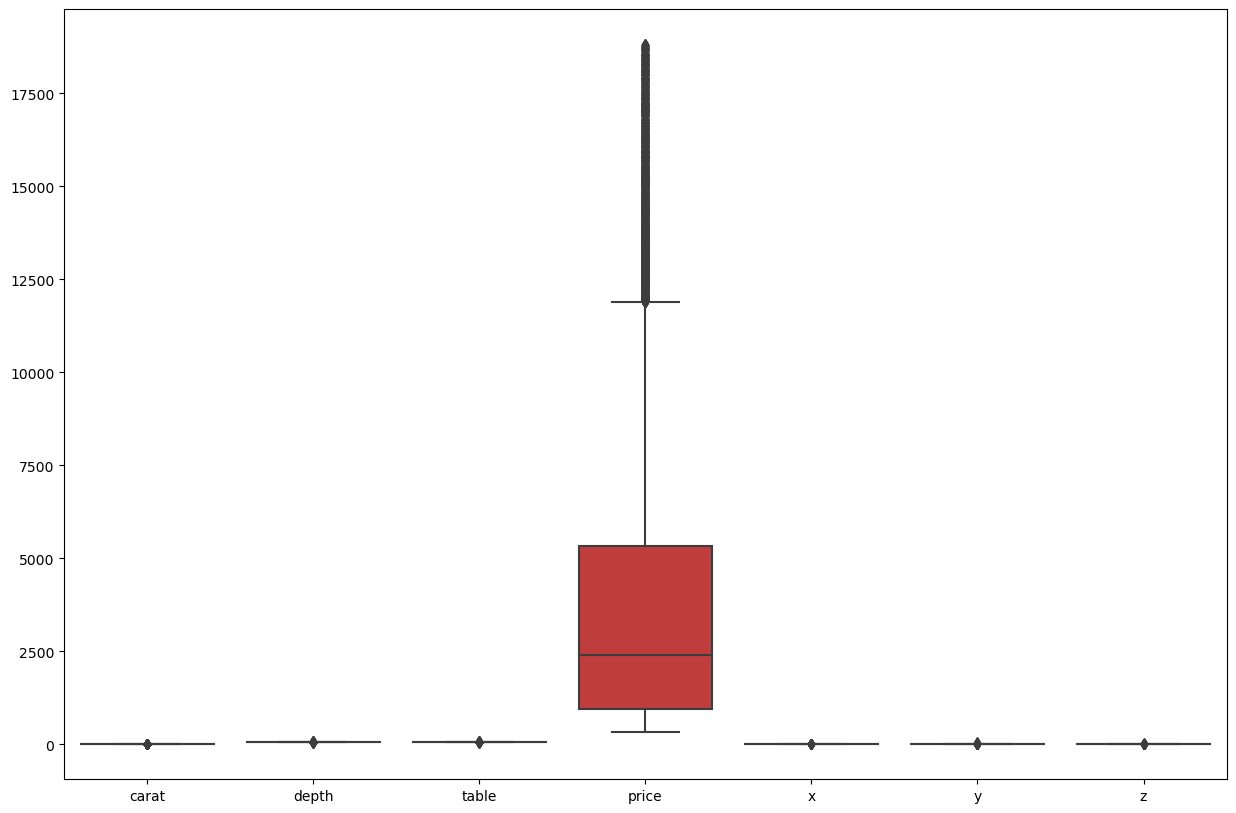

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)

<Figure size 3000x10000 with 0 Axes>

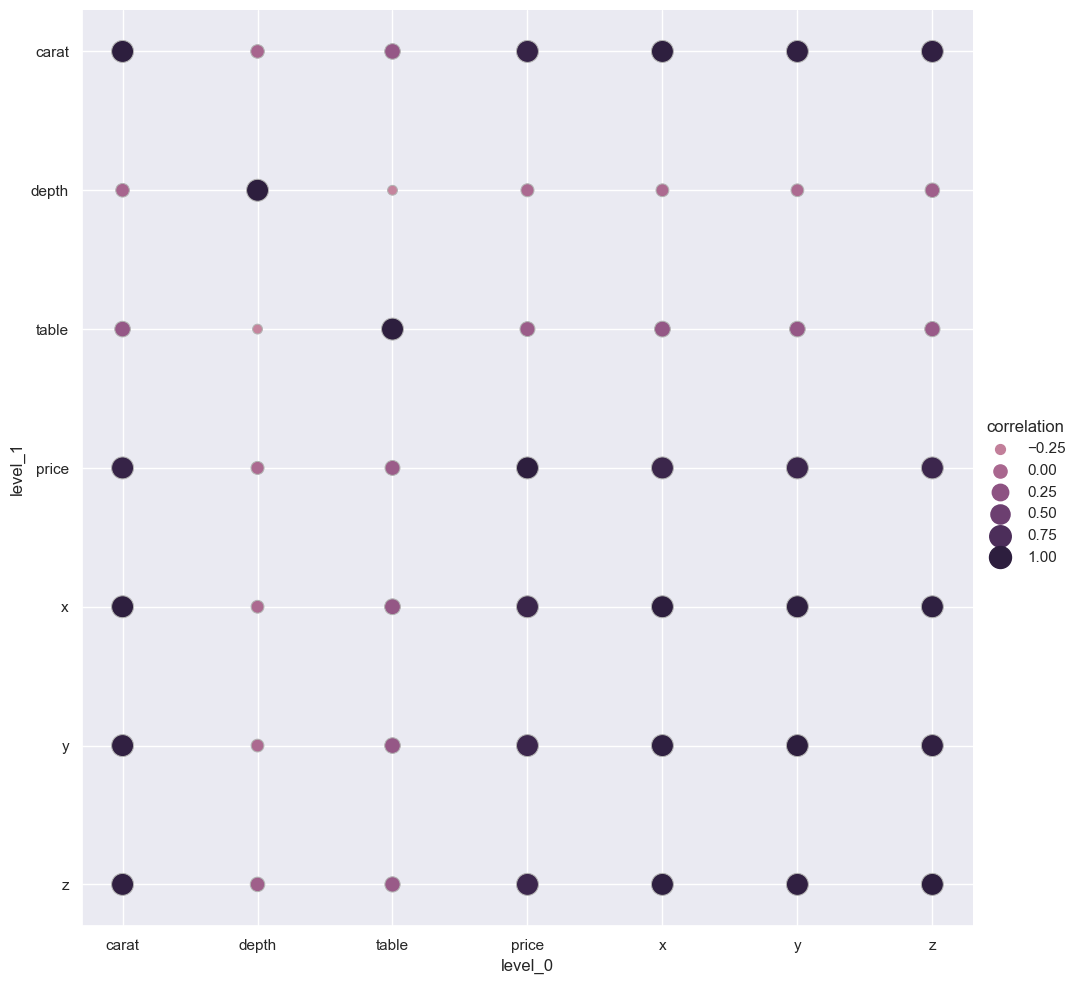

In [12]:
# Построим матрицу корреляции
plt.figure(figsize=(30, 100))
sns.set_theme(style="darkgrid")
corr_mat = df.corr(numeric_only=True).stack().reset_index(name="correlation")

g = sns.relplot(data=corr_mat, x="level_0", y="level_1", hue="correlation", size="correlation", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),)

<div class="alert alert-success">

**Выводы**
1. Глубина обратно пропорциональна цене.

> Это связано с тем, что если процент глубины алмаза слишком велик или мал, то алмаз станет "темным" на вид, потому что он больше не будет отражать привлекательное количество света.

2. Цена бриллианта в значительной степени зависит от карата и его размеров.

3. Вес (карат) бриллианта оказывает наиболее существенное влияние на его цену.

> Поскольку чем крупнее камень, тем он реже, один бриллиант весом в 2 карата будет "дороже", чем общая стоимость двух бриллиантов одинакового качества весом в 1 карат.

4. Длина (x), ширина (y) и высота (z), по-видимому, тесно связаны с ценой и даже друг с другом.

In [13]:
# Убирем выбросы. 
df = df[(df["depth"] < 75) & (df["depth"] > 45)]
df = df[(df["table"] < 80) & (df["table"] > 40)]
df = df[(df["x"] < 30)]
df = df[(df["y"] < 30)]
df = df[(df["z"] < 30) & (df["z"] > 2)]
df.shape

(53907, 10)

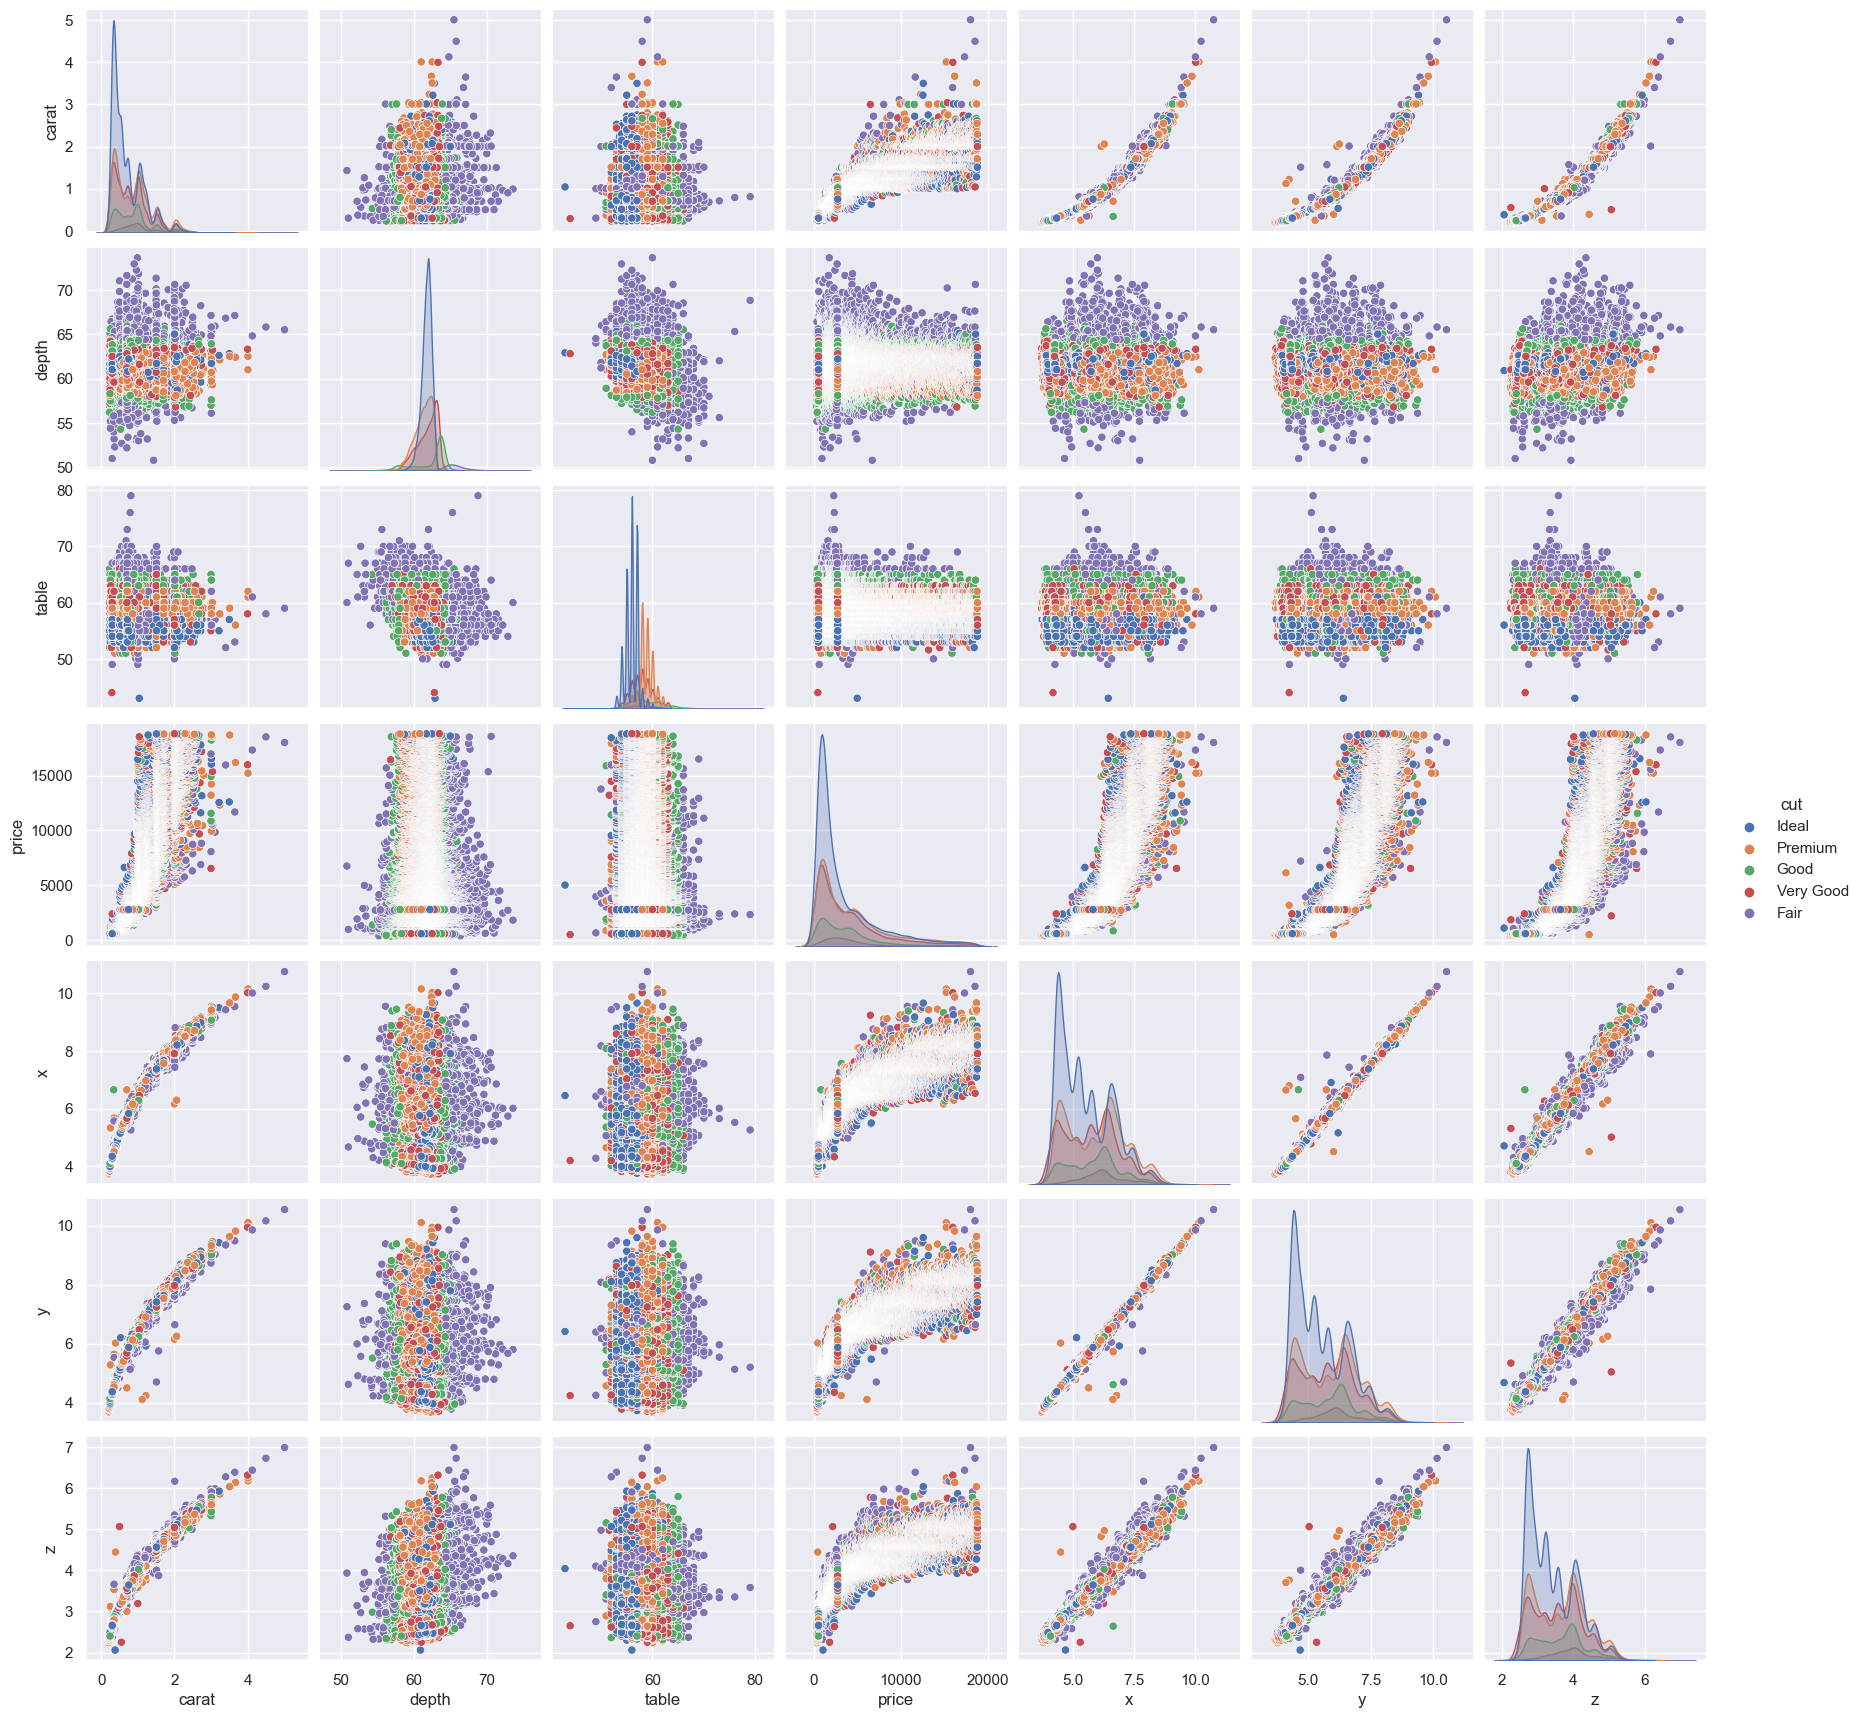

In [14]:
# Графическое представление взаимосвязей между парами переменных в DataFrame
sns.pairplot(df, hue= "cut")

<div class="alert alert-info">
    
> 6. Определите, какую задачу вы будете решать (классификация, регрессия и т.д.)

> 7. Создайте несколько моделей для прогнозирования вашего целевого признака и выберите наилучшую, опираясь на вашу валидацию

> 8. Сделайте прогноз для тестовой выборки (должно быть три выборки в этой задаче: тренировочная, валидационная, тестовая)

> 9. Приведите метрику, с помощью которой вы будете оценивать работу вашей модели (обоснуйте ваш выбор метрики)

> 10. Сделайте вывод о работе вашей модели и метриках. Обоснуйте: «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?»

<div style='border:solid blue 2px; padding: 20px'>
    
**Про метрики качетсва**

* И RMSE, и R^2 количественно определяют, насколько хорошо модель регрессии соответствует набору данных.

* RMSE говорит нам, насколько хорошо модель регрессии может предсказать значение переменной отклика в абсолютном выражении, в то время как R^2 говорит нам, насколько хорошо модель может предсказать значение переменной отклика в процентном выражении.

* Полезно рассчитать как RMSE, так и R^2 для данной модели, поскольку каждая метрика дает нам полезную информацию.

-----------------------------------

* Скорректированный R-квадрат говорит нам, насколько хорошо набор переменных-предикторов может объяснить изменение переменной отклика с поправкой на количество предикторов в модели. Из-за того, как он рассчитывается, скорректированный R-квадрат можно использовать для сравнения соответствия регрессионных моделей с различным количеством переменных-предикторов.

------------------------------------

* MAE полезна, когда важно измерить точность модели в абсолютных значениях ошибки, а не в относительных. Например, если мы строим модель для прогнозирования цен на недвижимость, мы можем быть заинтересованы в том, чтобы знать, насколько в среднем наша модель ошибается в долларах, а не в процентах.

--------------------------------------

* Основная причина использования MSE заключается в том, что она позволяет штрафовать модель за большие ошибки сильнее, чем за маленькие ошибки. Это свойство полезно во многих задачах, где важно минимизировать величину ошибки.

In [15]:
# Get list of categorical variables
s = (df.dtypes=="object")
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)

Categorical variables: ['cut', 'color', 'clarity']


In [16]:
# Примените кодировщик меток к каждому столбцу с категориальными данными
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# Создаем тренировочную и валидационную выборки.
X = df.drop(["price"], axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [18]:
# Построение конвейеров standardscaler и model для различных регрессий.

pipeline_lr = Pipeline([("scalar1", StandardScaler()), 
                        ("lr_classifier", LinearRegression())])
  
pipeline_dt = Pipeline([("scalar2", StandardScaler()), 
                        ("dt_classifier", DecisionTreeRegressor())])
  
pipeline_rf = Pipeline([("scalar3", StandardScaler()), 
                        ("rf_classifier", RandomForestRegressor())])
  
pipeline_kn = Pipeline([("scalar4", StandardScaler()), 
                        ("rf_classifier", KNeighborsRegressor())])
  
pipeline_xgb = Pipeline([("scalar5", StandardScaler()), 
                         ("rf_classifier", XGBRegressor())])

In [19]:
# Список всех трубопроводов pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

#  Словарь pipelines и типов моделей для удобства использования
pipe_dict = {0: "LinearRegression", 
             1: "DecisionTree", 
             2: "RandomForest",
             3: "KNeighbors", 
             4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [20]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print(f"{pipe_dict[i]}: {cv_score.mean()}")
    # print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.8118237569508
DecisionTree: -750.369378100554
RandomForest: -546.7492698189344
KNeighbors: -823.6560820178805
XGBRegressor: -545.4581076104371


In [21]:
# Списки для качеств метрик
R_2_el = []
RMSE = []
Adjusted_R_2 = []
MAE = []
MSE = []

In [22]:
# Тестирование моделей с лучшим результатом в тестовом наборе

pred = pipeline_xgb.predict(X_test)

# Предсказания модели
R_2_el.append(r2_score(y_test, pred))
RMSE.append(np.sqrt(mean_squared_error(y_test, pred)))
Adjusted_R_2.append(1 - (1 - r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
MAE.append(mean_absolute_error(y_test, pred))
MSE.append(mean_squared_error(y_test, pred))

pred = pipeline_lr.predict(X_test)
RMSE.append(np.sqrt(mean_squared_error(y_test, pred)))
Adjusted_R_2.append(1 - (1 - r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
MAE.append(mean_absolute_error(y_test, pred))
MSE.append(mean_squared_error(y_test, pred))

pred = pipeline_dt.predict(X_test)
RMSE.append(np.sqrt(mean_squared_error(y_test, pred)))
Adjusted_R_2.append(1 - (1 - r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
MAE.append(mean_absolute_error(y_test, pred))
MSE.append(mean_squared_error(y_test, pred))

pred = pipeline_rf.predict(X_test)
RMSE.append(np.sqrt(mean_squared_error(y_test, pred)))
Adjusted_R_2.append(1 - (1 - r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
MAE.append(mean_absolute_error(y_test, pred))
MSE.append(mean_squared_error(y_test, pred))

pred = pipeline_kn.predict(X_test)
RMSE.append(np.sqrt(mean_squared_error(y_test, pred)))
Adjusted_R_2.append(1 - (1 - r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
MAE.append(mean_absolute_error(y_test, pred))
MSE.append(mean_squared_error(y_test, pred))


In [23]:
d = {'R^2': R_2_el, 'RMSE': RMSE, 'Adjusted R^2': Adjusted_R_2, 'MAE': MAE, 'MSE': MSE}
data = pd.DataFrame(data=d, index=['pipeline_xgb', 'pipeline_lr', 'pipeline_dt', 'pipeline_rf', 'pipeline_kn'])

In [24]:
data

,R^2,RMSE,Adjusted R^2,MAE,MSE
pipeline_xgb,0.981085,544.736968,0.981072,278.093400,2.967384e+05
pipeline_lr,0.981085,1319.539188,0.888936,849.350740,1.741184e+06
pipeline_dt,0.981085,749.973893,0.964123,361.545225,5.624608e+05
pipeline_rf,0.981085,547.564383,0.980875,270.091820,2.998268e+05
pipeline_kn,0.981085,792.762071,0.959912,402.926052,6.284717e+05


<div class="alert alert-success">

# Вывод:
    
1. В приведенных выше оценках XGBRegressor, по-видимому, является моделью с наилучшей оценкой по отрицательной среднеквадратичной ошибке.
    
2. ### «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?
    
> Машинное обучение нужно, так как задача требует анализа данныхи построения модели, которая может автоматически улучшаться на основе опыта. Однако, в некоторых случаях, можно обойтись dummy-предсказанием, если точность не является критическим фактором.